In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
newsdata = pd.read_csv("/content/drive/MyDrive/MLproject/train.csv")
newsdata.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [ ]:
newsdata.isnull().sum()
newsdata = newsdata.fillna('')
newsdata['id'].shape()

TypeError: ignored

In [ ]:
newsdata['combined'] = newsdata['author']+' '+newsdata['title']
print(newsdata['combined'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: combined, Length: 20800, dtype: object


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

import nltk
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from tqdm import tqdm
import re
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
stop_nltk = stopwords.words("english")
punct_stop = list(punctuation) + stop_nltk


In [ ]:

def lemmetization(text):
    lemm_text = re.sub('[^a-zA-Z]',' ',text)
    lemm_text = lemm_text.lower()
    lemm_text = word_tokenize(lemm_text)
    lemm_text = [lemm.lemmatize(word, pos = "v") for word in lemm_text if not word in punct_stop]
    lemm_text = ' '.join(lemm_text)
    return lemm_text

In [ ]:
newsdata['combined'] = newsdata['combined'].apply(lemmetization)

In [ ]:
newsdata['combined'].head(10)


0    darrell lucus house dem aide even see comey le...
1    daniel j flynn flynn hillary clinton big woman...
2              consortiumnews com truth might get fire
3    jessica purkiss civilians kill single us airst...
4    howard portnoy iranian woman jail fictional un...
5    daniel nussbaum jackie mason hollywood would l...
6    life life luxury elton john favorite shark pic...
7    alissa j rubin beno hamon win french socialist...
8    excerpt draft script donald trump q ampa black...
9    megan twohey scott shane back channel plan ukr...
Name: combined, dtype: object

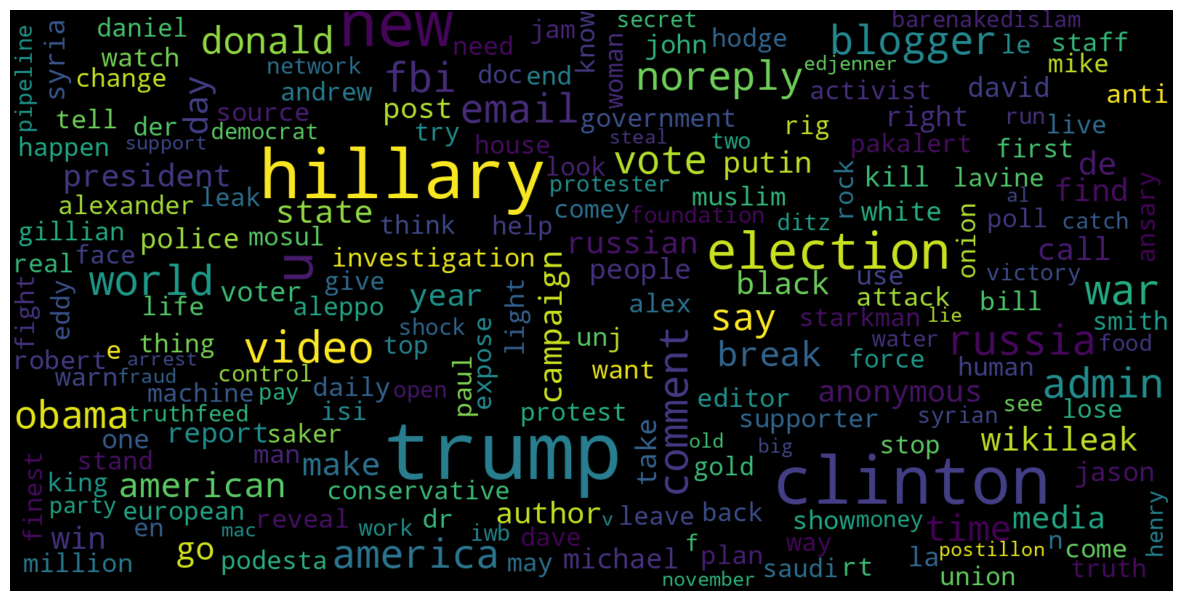

In [ ]:
from wordcloud import WordCloud
consolidated = ' '.join(
	word for word in newsdata['combined'][newsdata['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


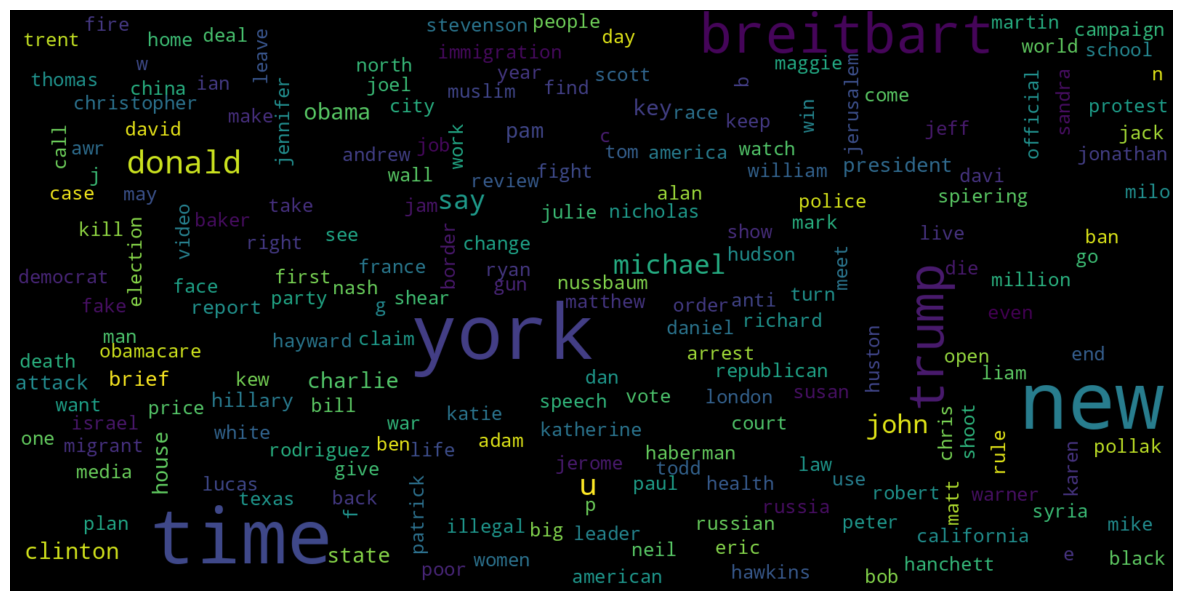

In [ ]:
from wordcloud import WordCloud
consolidated = ' '.join(
	word for word in newsdata['combined'][newsdata['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

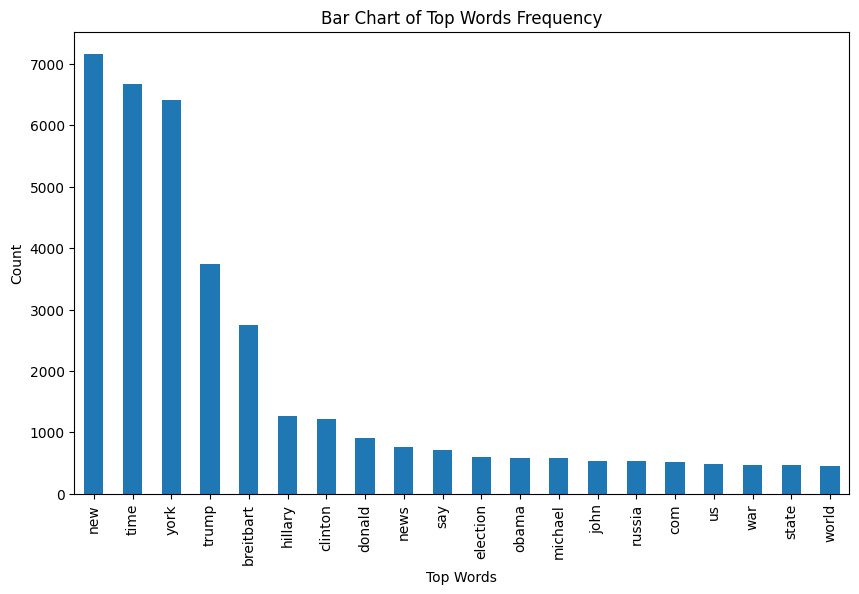

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(newsdata['combined'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)


In [ ]:
x = np.array(newsdata['combined'].values)
y = newsdata['label'].values

In [ ]:
x

array(['darrell lucus house dem aide even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillary clinton big woman campus breitbart',
       'consortiumnews com truth might get fire', ...,
       'michael j de la merced rachel abrams macy say receive takeover approach hudson bay new york time',
       'alex ansary nato russia hold parallel exercise balkans',
       'david swanson keep f alive'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1) # 0.125 x 0.8 = 0.1

In [ ]:
X_train

array(['seth berkman columbia suspend wrestle season lewd racist text message new york time',
       'keith bradsher despite climate change vow china push dig coal new york time',
       'eli rosenberg nothing short miracle serious injuries tappan zee crane collapse new york time',
       ...,
       'gretchen reynolds carbs workouts may fend colds new york time',
       'emmarie huetteman nancy pelosi beat back house democratic leadership challenge new york time',
       'sink cost billion waste imaginary weapons since'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# converting the text data to numerical data 


vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
#X_val = vectorization.transform(X_val)
X_test = vectorization.transform(X_test)



In [ ]:
X_train[0]

<1x17694 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [ ]:
X_test[0]

<1x17694 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, \
    precision_recall_curve, mean_squared_error, log_loss
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
    GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc
import matplotlib.pyplot as plt

from sklearn import metrics




Accuracy:  0.9908653846153846
F1-score:  0.9910122989593189
ROC AUC:  0.9909393530461291
Average Precision:  0.9886098261284799
Precision/Recall Break-Even Point:  0
Squared Error:  0.009134615384615385
Cross-Entropy:  0.3292449107659742


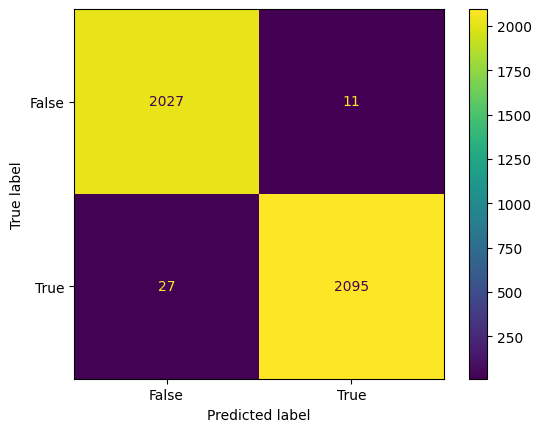

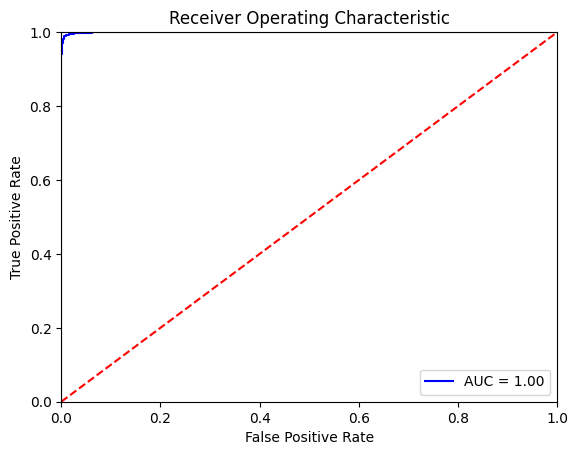

In [ ]:
classifier=MLPClassifier()
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


In [ ]:
X

Accuracy:  0.9747596153846154
F1-score:  0.9756210819596006
ROC AUC:  0.9744433982420717
Average Precision:  0.9570882704281896
Precision/Recall Break-Even Point:  0
Squared Error:  0.025240384615384616
Cross-Entropy:  0.9097556744849284


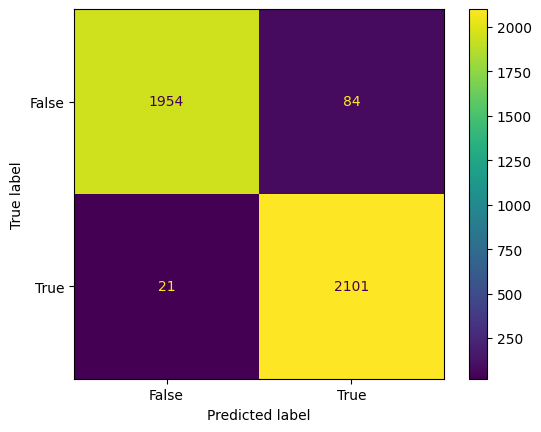

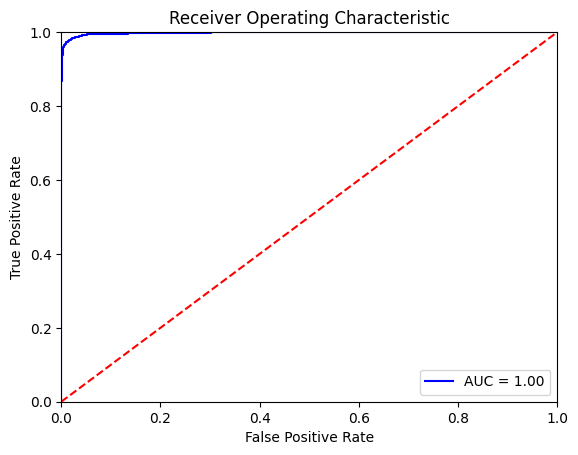

In [ ]:
classifier=LogisticRegression()
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


Accuracy:  0.9925480769230769
F1-score:  0.9927349425826106
ROC AUC:  0.9924333516161823
Average Precision:  0.986512839187203
Precision/Recall Break-Even Point:  0
Squared Error:  0.007451923076923077
Cross-Entropy:  0.268594532466979


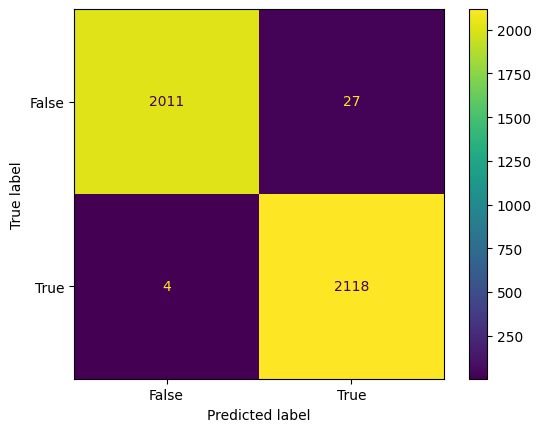

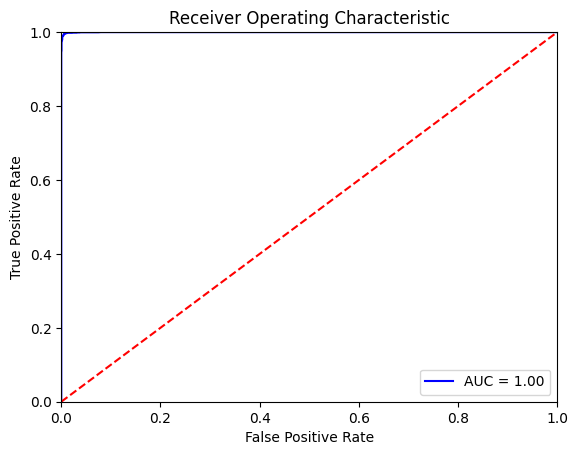

In [ ]:
classifier=RandomForestClassifier()
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


Accuracy:  0.9947115384615385
F1-score:  0.994818652849741
ROC AUC:  0.9946996695213194
Average Precision:  0.9920682177891759
Precision/Recall Break-Even Point:  0
Squared Error:  0.005288461538461539
Cross-Entropy:  0.19061547465398518


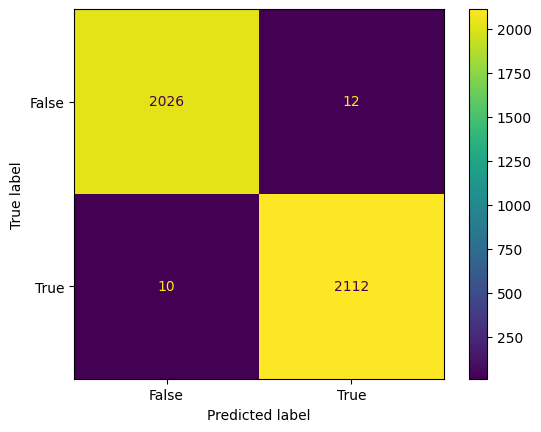

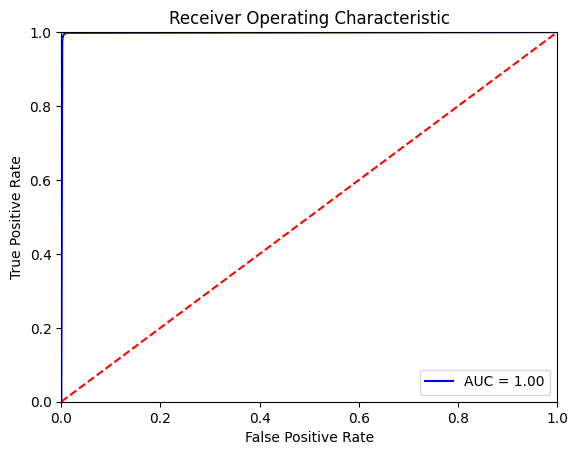

In [ ]:
classifier=BaggingClassifier()
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


Accuracy:  0.9644230769230769
F1-score:  0.9661946094106899
ROC AUC:  0.9637578746511845
Average Precision:  0.9360900909881824
Precision/Recall Break-Even Point:  0
Squared Error:  0.035576923076923075
Cross-Entropy:  1.282322284035899


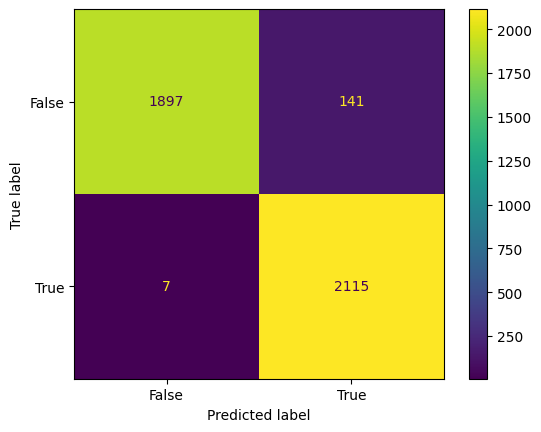

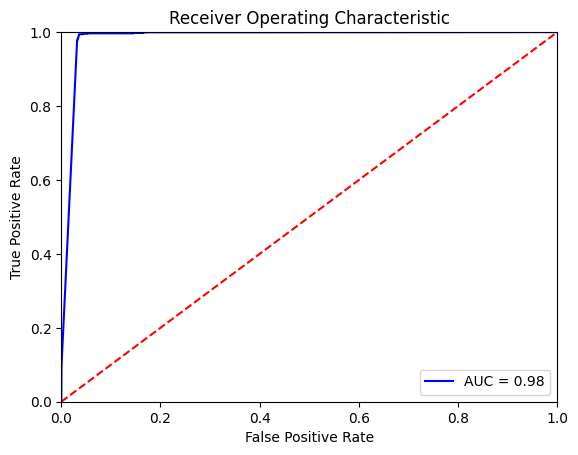

In [ ]:
classifier=GradientBoostingClassifier()
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


Accuracy:  0.9944711538461538
F1-score:  0.9945869616380325
ROC AUC:  0.9944446191540744
Average Precision:  0.9913680555846706
Precision/Recall Break-Even Point:  0
Squared Error:  0.005528846153846154
Cross-Entropy:  0.1992798144109845


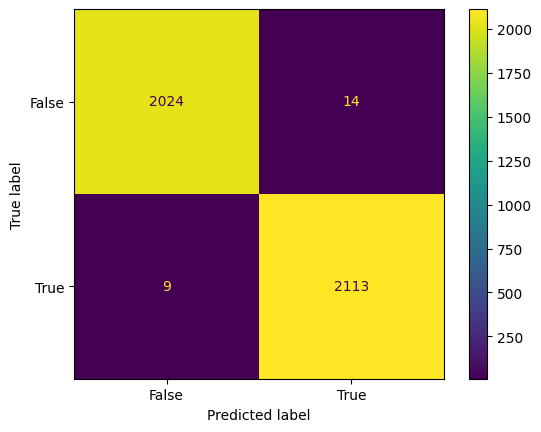

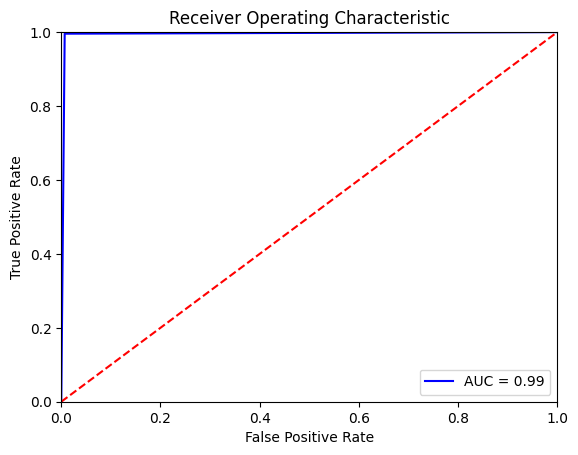

In [ ]:
classifier=DecisionTreeClassifier()
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


In [ ]:
?SVC

Accuracy:  0.994951923076923
F1-score:  0.9950506716945557
ROC AUC:  0.9949547198885641
Average Precision:  0.9927701250066955
Precision/Recall Break-Even Point:  0
Squared Error:  0.005048076923076923
Cross-Entropy:  0.18195113489698586


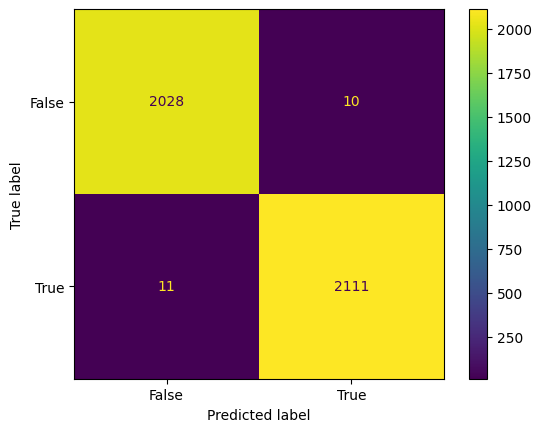

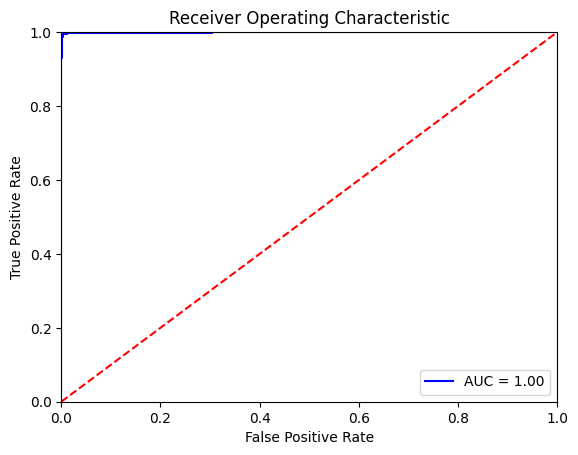

In [ ]:
classifier=SVC(kernel='sigmoid', C=1e9, gamma=1e-07, probability=True)
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


Accuracy:  0.9387019230769231
F1-score:  0.9364881693648817
ROC AUC:  0.9397889209635216
Average Precision:  0.9380454974136685
Precision/Recall Break-Even Point:  0
Squared Error:  0.06129807692307692
Cross-Entropy:  2.2094066380348254


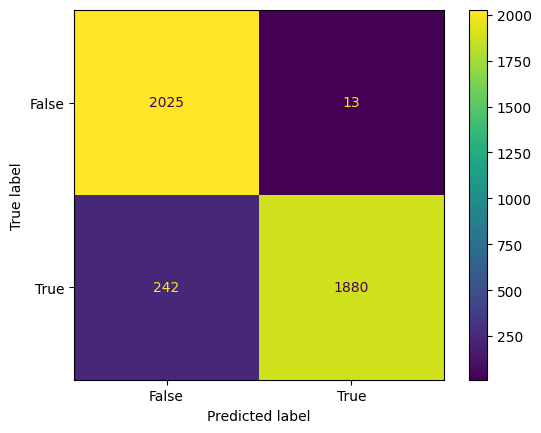

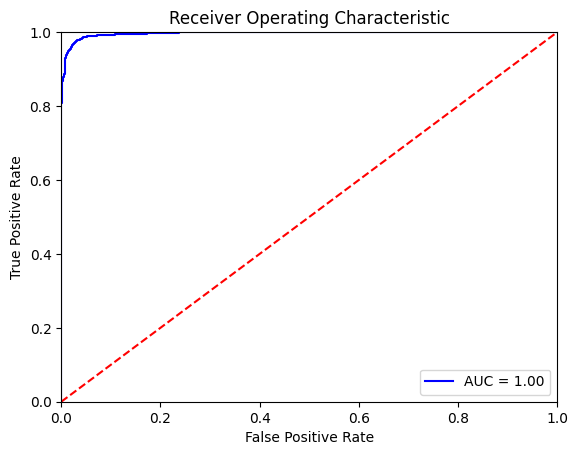

In [ ]:
classifier=MultinomialNB()
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")


In [ ]:
 ?KNeighborsClassifier

Accuracy:  0.5879807692307693
F1-score:  0.7118359112306657
ROC AUC:  0.5795382547802868
Average Precision:  0.5532175481000177
Precision/Recall Break-Even Point:  0
Squared Error:  0.41201923076923075
Cross-Entropy:  14.850678343496824


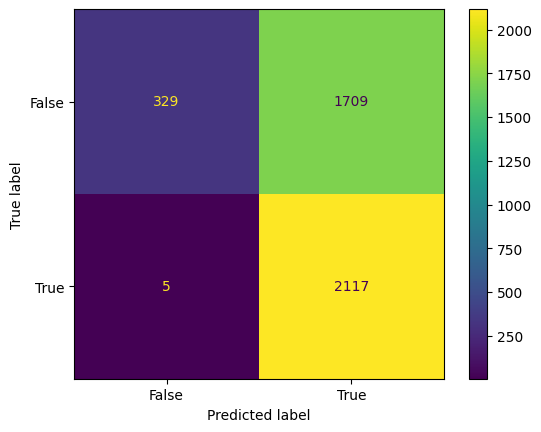

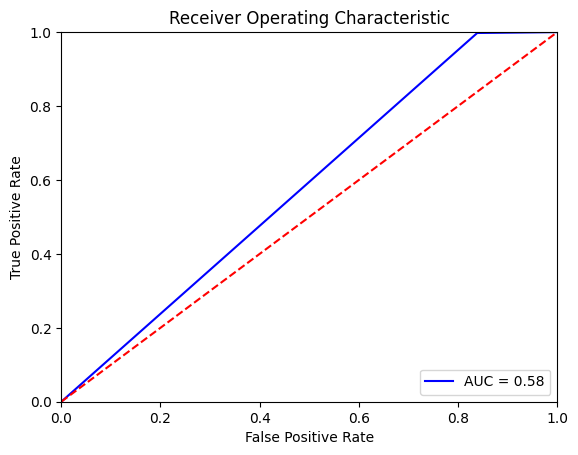

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=1)
history=classifier.fit(X_train, y_train)

    # Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

squared_error = mean_squared_error(y_test, y_pred)

cross_entropy = log_loss(y_test, y_pred)

precision_recall_be_point = 0
for p, r, t in zip(precision, recall, thresholds):

  if p == r:

    precision_recall_be_point = p
  break
    

    # Print the results for the current classifier

print("Accuracy: ", accuracy)
print("F1-score: ", f1)
print("ROC AUC: ", roc_auc)
print("Average Precision: ", average_precision)
print("Precision/Recall Break-Even Point: ", precision_recall_be_point)
print("Squared Error: ", squared_error)
print("Cross-Entropy: ", cross_entropy)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
   
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   # print("-------------------------------------------------------")
